# CAS KAGGLE: BIKE SHARING LONDON

### LLIBRERIES
Aquí podem trobar totes les llibreries que hem utilitzat per tal de fer l'estudi:

In [28]:
from sklearn.datasets import make_regression
import missingno as msno
import math
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import accuracy_score, r2_score

# Classifiers Models Libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Data Import
Ara importarem les dades del csv que ha estat descarregat de Kaggle amb les dades del lloguer de bicicletes a la ciutat anglesa de Londres.

In [29]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset
dataset = load_dataset('london_merged.csv')
data = dataset.values

print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (17414, 10)


### Anàlisis Preliminar de les Dades
Mostrem les dades que conté el dataset:

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Per saber els tipus dels atributs del nostre dataset el que farem serà utilitzar la funció dtypes de la llibreria pandas.

In [31]:
dataset.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

Veiem un exemple de les dades que conté el nostre dataset:

In [32]:
dataset.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Com que l'atribut timestamp no ens aporta nigun valor l'eliminem del dataset:

In [33]:
dataset = dataset.drop(["timestamp"], axis = 1)

### Valors NaN
Anem a comprovar si el nostre dataset té valors NaN:

In [34]:
print(dataset.isnull().sum())

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [35]:
dataset.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


### Correlació dels Atributs
Un cop hem analitzat de forma preliminar les dades del nostre dataset és hora de veure quina és la correlació que tenim entre els nostres atributs. Com ja hem comentat abans l’atribut target que farem servir en aquest estudi és el cnt

<IPython.core.display.Javascript object>


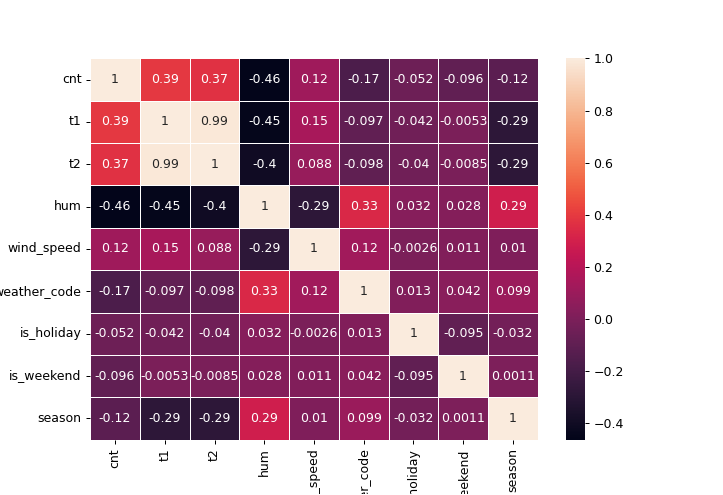

In [37]:
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

### Distribuació Normal de les Dades
Ara passarem a fer la distribució normal de les dades per tal de veure si podem veure tendències a partir de la generació d’histogrames de les diferents dades respecte el nombre de lloguers de bicicletes.

<IPython.core.display.Javascript object>


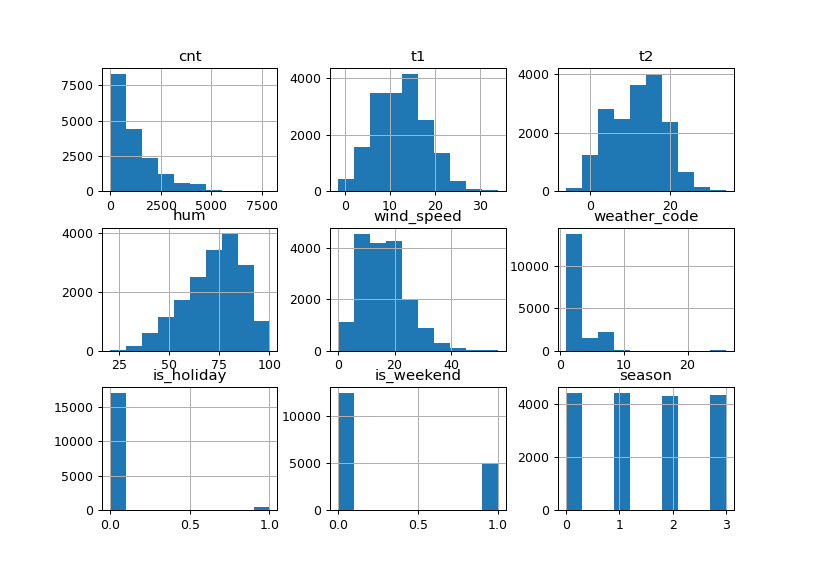

array([[<AxesSubplot:title={'center':'cnt'}>,
        <AxesSubplot:title={'center':'t1'}>,
        <AxesSubplot:title={'center':'t2'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'weather_code'}>],
       [<AxesSubplot:title={'center':'is_holiday'}>,
        <AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'season'}>]], dtype=object)

In [38]:
dataset.hist()

### Regressions
Per tal de fer les regressions utilitzarem les difernts funcions:
- Error Quadràtic Mitjà
- Estanadrització
- Regressió
- Divisió de les Dades

In [39]:

def mean_squared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_t = x_train - mean
    x_t /= std
    return x_t

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

# Dividim les dades en 80% entrenament i 20% de test
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

Regressió Lineal per a les dades que tenen una major correlació:
- Tempreatura 
- Senació Tèrmica
- Velocitat del Vent

#### Regressió Lineal Temperatura

<IPython.core.display.Javascript object>


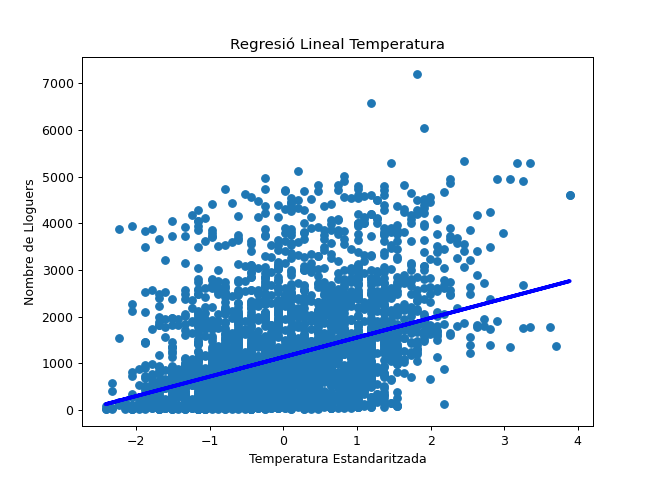

In [40]:
x = data[:,np.newaxis,2]

y = dataset['cnt']

x_train, y_train, x_test, y_test = split_data(x, y)

x_norm_train = standarize(x_train)

x_norm_test = standarize(x_test)

regr = regression(x_norm_train,y_train)

prediction = regr.predict(x_norm_test)

plt.scatter(x_norm_test,y_test)
plt.plot(x_norm_test,prediction,color='blue',linewidth=3)
plt.title('Regresió Lineal Temperatura')
plt.xlabel('Temperatura Estandaritzada')
plt.ylabel('Nombre de Lloguers')
plt.show()

Ara ja amb la predicció feta veiem a través del error quadràtic mitjà quina és la correlació que exiteix entre el target i la temperatura.

Tot seguit a través de la funció r2_score ens indicarà quina és la relació que exiteix entre els dos atributs en una escala de 0-1:

In [41]:
y_test = y_test.to_numpy()

print("Mean squeared error: ", mean_squared_error(prediction, y_test))
print("R2 Score for t1: ", r2_score(y_test, prediction))

Mean squeared error:  1062532.1650545953
R2 Score for t1:  0.15135569398804338


#### Sensació Tèrmica

<IPython.core.display.Javascript object>


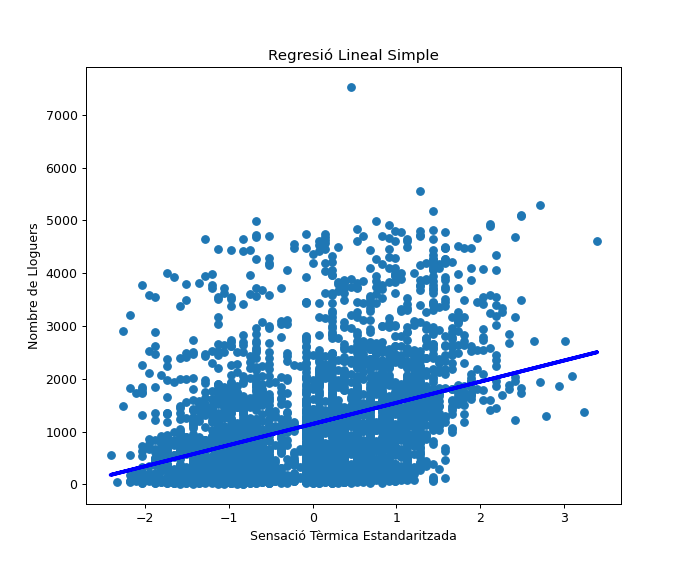

In [42]:
x = data[:,np.newaxis,3]

y = dataset['cnt']

x_train, y_train, x_test, y_test = split_data(x, y)

x_norm_train = standarize(x_train)

x_norm_test = standarize(x_test)

regr = regression(x_norm_train,y_train)

prediction = regr.predict(x_norm_test)

plt.scatter(x_norm_test,y_test)
plt.plot(x_norm_test,prediction,color='blue',linewidth=3)
plt.title('Regresió Lineal Simple')
plt.xlabel('Sensació Tèrmica Estandaritzada')
plt.ylabel('Nombre de Lloguers')
plt.show()

Ara ja amb la predicció feta veiem a través del error quadràtic mitjà quina és la correlació que exiteix entre el target i la sensació tèrmica.

Tot seguit a través de la funció r2_score ens indicarà quina és la relació que exiteix entre els dos atributs en una escala de 0-1:

In [43]:
y_test = y_test.to_numpy()

print("Mean squeared error: ", mean_squared_error(prediction, y_test))
print("R2 Score for t2: ", r2_score(y_test, prediction))

Mean squeared error:  1042414.6127493585
R2 Score for t2:  0.13376009276401613


#### Velocitat del Vent

<IPython.core.display.Javascript object>


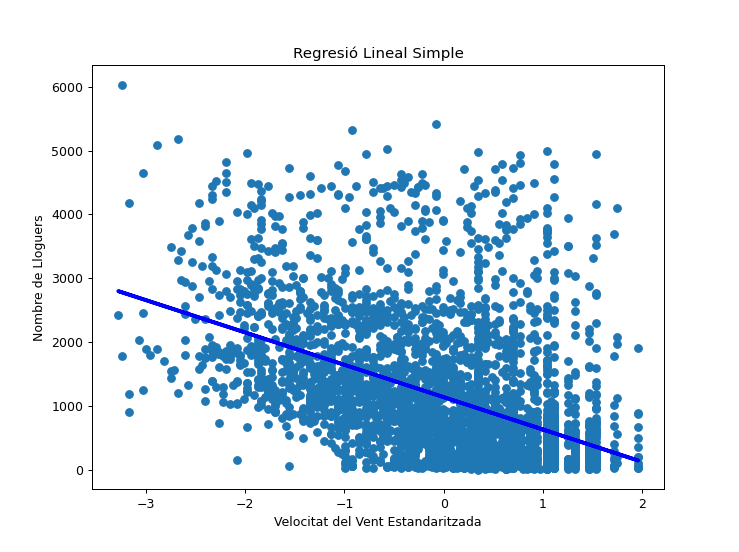

In [44]:
x = data[:,np.newaxis,4]

y = dataset['cnt']

x_train, y_train, x_test, y_test = split_data(x, y)

x_norm_train = standarize(x_train)

x_norm_test = standarize(x_test)

regr = regression(x_norm_train,y_train)

prediction = regr.predict(x_norm_test)

plt.scatter(x_norm_test,y_test)
plt.plot(x_norm_test,prediction,color='blue',linewidth=3)
plt.title('Regresió Lineal Simple')
plt.xlabel('Velocitat del Vent Estandaritzada')
plt.ylabel('Nombre de Lloguers')
plt.show()

Ara ja amb la predicció feta veiem a través del error quadràtic mitjà quina és la correlació que exiteix entre el target i la velocitat del vent.

Tot seguit a través de la funció r2_score ens indicarà quina és la relació que exiteix entre els dos atributs en una escala de 0-1:

In [45]:
y_test = y_test.to_numpy()

print("Mean squeared error: ", mean_squared_error(prediction, y_test))
print("R2 Score for wind_speed: ", r2_score(y_test, prediction))

Mean squeared error:  936361.513417973
R2 Score for wind_speed:  0.2013813740167648


In [46]:
dataset_copy = dataset
dataset_copy=dataset_copy.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
dataset_normalized=(dataset_copy - dataset_copy.min()) / ( dataset_copy.max() - dataset_copy.min())
dataset_normalized

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,0.023155,0.126761,0.2000,0.911950,0.106195,0.08,0.0,1.0,1.0
1,0.017557,0.126761,0.2125,0.911950,0.088496,0.00,0.0,1.0,1.0
2,0.017048,0.112676,0.2125,0.955975,0.000000,0.00,0.0,1.0,1.0
3,0.009160,0.098592,0.2000,1.000000,0.000000,0.00,0.0,1.0,1.0
4,0.005980,0.098592,0.1500,0.911950,0.115044,0.00,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
17409,0.132570,0.183099,0.1750,0.761006,0.336283,0.08,0.0,0.0,1.0
17410,0.068830,0.183099,0.1750,0.761006,0.371681,0.12,0.0,0.0,1.0
17411,0.042875,0.197183,0.1875,0.729560,0.424779,0.12,0.0,0.0,1.0
17412,0.028499,0.197183,0.1875,0.698113,0.407080,0.12,0.0,0.0,1.0


In [47]:
data = dataset_normalized.values
x = data[:, :9]
y = dataset['cnt']

x_train, y_train, x_test, y_test = split_data(x, y)

x_norm_train = standarize(x_train)

x_norm_test = standarize(x_test)

regr = regression(x_norm_train,y_train)

prediction = regr.predict(x_norm_test)

In [48]:
y_test = y_test.to_numpy()

print("Mean squeared error: ", mean_squared_error(prediction, y_test))
print("R2 Score: ", r2_score(y_test, prediction))

Mean squeared error:  74.04457701079444
R2 Score:  0.9999386343355833


### Selecció de Model
Ara anem a seleccionar quin es el model de classificació que farem servir per tal de poder fer una predicció del nostre target que és el nombre de lloguers de bicicletes a la ciutat de Londres.
Primer de tot el que haurem de fer és dividir les nostres dades de train i de test per tal de poder fer l'entrenament del model:

In [21]:
atributes = dataset[['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday','is_weekend', 'season']]
target = dataset['cnt']
x_train, x_test, y_train, y_test = train_test_split(atributes, target, test_size=0.2,train_size = 0.8, random_state=42)


Un cop ja tenim les dades que les hem dividit en train i test el que farem serà a través del GridSearch trobar quins són els hiperparàmetres dins del dataset que s'adapten millor a cadascún dels models.
Els diferents models que s'utilitzaràn són:
- SVM
- KNN
- Regressió Logística
- Decision Tree

### Hiperparàmetres

In [22]:
# Paràmetres per el model SVM
svm_param = {'kernel': ['rbf', 'poly', 'sigmoid']}

model_svm = svm.SVC(probability=True)

grid = GridSearchCV(model_svm, svm_param, verbose=3, n_jobs=-1)
grid.fit(x_train,y_train)
print("Els millors atributs del dataset en el model SVM: ",grid.best_params_)
print("El millor score en el model SVM: ", grid.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\alexg\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Els millors atributs del dataset en el model SVM:  {'kernel': 'rbf'}
El millor score en el model SVM:  0.00251238250816335


In [23]:
# Paràmetres per el model KNN
knn_param = { 'n_neighbors' : [5,7,9,11,13,15], 'weights' : ['uniform','distance'], 'metric' : ['minkowski','euclidean','manhattan']}

model_knn = KNeighborsClassifier()

grid = GridSearchCV(model_knn, knn_param, verbose=3, n_jobs=-1)
grid.fit(x_train,y_train)
print("Els millors atributs del dataset en el model KNN: ",grid.best_params_)
print("El millor score en el model KNN: ", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\alexg\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Els millors atributs del dataset en el model KNN:  {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
El millor score en el model KNN:  0.0022970199812430343


In [24]:
# Paràmetres per el model de regressió logística
regressio_log_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

model_regressio_log = LogisticRegression()

grid = GridSearchCV(model_regressio_log, regressio_log_param, verbose=3, n_jobs=-1)
grid.fit(x_train,y_train)
print("Els millors atributs del dataset en el model de Regressió Logística: ",grid.best_params_)
print("El millor score en el model de Regressió Logística: ", grid.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\alexg\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Els millors atributs del dataset en el model de Regressió Logística:  {'C': 100}
El millor score en el model de Regressió Logística:  0.0027995840600305334


C:\Users\alexg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Paràmetres per el model de decision tree
decision_tree_param = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }

model_decision_tree = DecisionTreeClassifier()

grid = GridSearchCV(model_decision_tree, decision_tree_param, verbose=3, n_jobs=-1)
grid.fit(x_train,y_train)
print("Els millors atributs del dataset en el model de Decision Tree: ",grid.best_params_)
print("El millor score en el model de Decision Tree: ", grid.best_score_)

C:\Users\alexg\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Els millors atributs del dataset en el model de Decision Tree:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
El millor score en el model de Decision Tree:  0.0034455686088446227
